In [1]:
import numpy as np
import scipy
from scipy import special
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
plt.style.use('seaborn-pastel')
import time

0.0008512540013104993


<IPython.core.display.Javascript object>


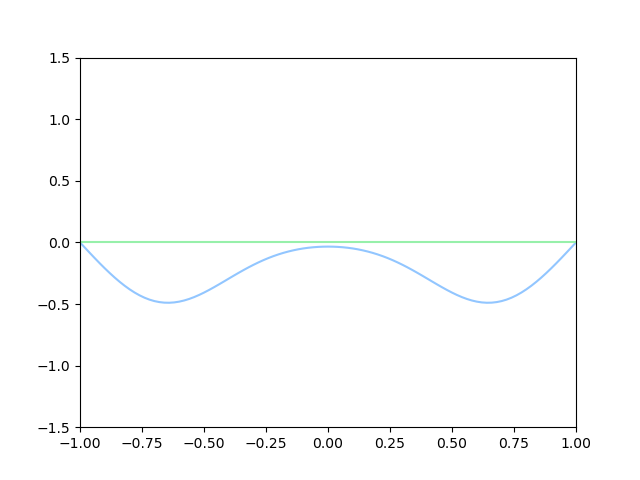

[[ 0.00033546  0.0004605   0.00062811 ...  0.00062811  0.0004605
   0.00033546]
 [ 0.          0.00046083  0.00062854 ...  0.00062854  0.00046083
   0.        ]
 [ 0.          0.00045658  0.00062984 ...  0.00062984  0.00045658
   0.        ]
 ...
 [ 0.         -0.00031609 -0.0006592  ... -0.0006592  -0.00031609
   0.        ]
 [ 0.         -0.00033401 -0.00068562 ... -0.00068562 -0.00033401
   0.        ]
 [ 0.         -0.0003522  -0.0007122  ... -0.0007122  -0.0003522
   0.        ]]


In [40]:
#1-ая разностная схема
L = 1
T = 100
a = 0.25
N_z = 100
N_t = 20000
c = 0.5
h = 2*L / N_z
tau = T / N_t
r = c * tau / h #  число Куранта
z = np.arange(-L, L+h, h)
t = np.arange(0, T+tau, tau)
fi = np.zeros(N_z)
#задаем функцию фи
fi = np.exp(-np.power(z, 2)/(2*a**2))
E = np.zeros([len(t), len(z)])
E[:][0] = fi
print(E[0][3])
E[len(t)-1][0] = 0
E[len(t) - 1][len(z) - 1] = 0
#аналитическое решение
E_analit = np.zeros([len(t), len(z)])
for n in range(len(t)):
    E_analit[n] = 0.5*(np.exp(-np.power(z - c*t[n], 2)/(2*a**2)) + np.exp(-np.power(z + c*t[n], 2)/(2*a**2)))

for j in range(1,len(z) - 1):
    E[1][j] = E[0][j] + (r**2 / 2) *(E[0][j+1] - 2 * E[0][j] + E[0][j-1])
for n in range(1, len(t)-1):
    for j in range(1, len(z)-1):
        E[n+1][j] = 2 * E[n][j] - E[n-1][j] + r**2*(E[n][j+1] - 2 * E[n][j] + E[n][j-1])
fig = plt.figure()
ax = plt.axes(xlim=(-L, L), ylim=(-1.5, 1.5))
line = []
N = 2
for j in range(N):
    temp, = plt.plot([], [])
    line.append(temp)
line = tuple(line)
def init():
    for j in range(N):
        line[j].set_data([], [])
    return line,
def animate(i):
    #x_i = np.arange(0, L, h)
    #y = g_t_h[i]
    x_i = z
    y1 = E[i]
    y2 = E_analit[i]
    line[0].set_data(x_i, y1)
    line[1].set_data(x_i, y2)
    return line,
print(E)
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=20000, interval=5, blit=True, repeat = False)

0.0008512540013104993


<IPython.core.display.Javascript object>


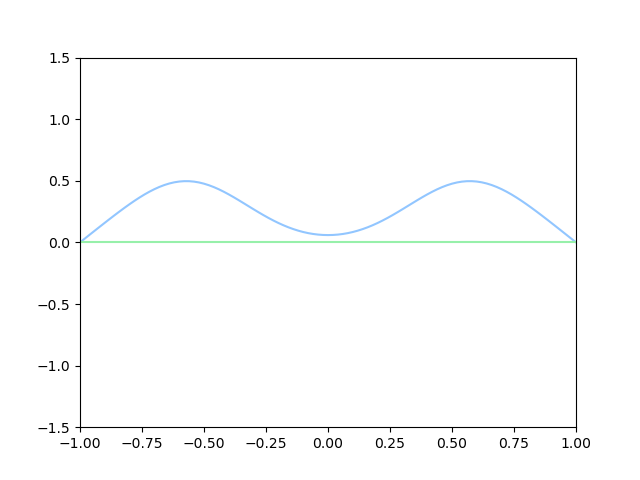

[[ 0.00033546  0.0004605   0.00062811 ...  0.00062811  0.0004605
   0.00033546]
 [ 0.          0.00046083  0.00062854 ...  0.00062854  0.00046083
   0.        ]
 [ 0.          0.00045658  0.00062984 ...  0.00062984  0.00045658
   0.        ]
 ...
 [ 0.         -0.00031609 -0.0006592  ... -0.0006592  -0.00031609
   0.        ]
 [ 0.         -0.00033401 -0.00068562 ... -0.00068562 -0.00033401
   0.        ]
 [ 0.         -0.0003522  -0.0007122  ... -0.0007122  -0.0003522
   0.        ]]


In [38]:
#2-ая разностная схема
L = 1
T = 100
a = 0.25
N_z = 100
N_t = 20000
c = 0.5
h = 2*L / N_z
tau = T / N_t
r = c * tau / h #  число Куранта
z = np.arange(-L, L+h, h)
t = np.arange(0, T+tau, tau)
fi = np.zeros(N_z)
#задаем функцию фи
fi = np.exp(-np.power(z, 2)/(2*a**2))
E = np.zeros([len(t), len(z)])
H = np.zeros([len(t), len(z)])
E[:][0] = fi
print(E[0][3])
E[len(t)-1][0] = 0
E[len(t) - 1][len(z) - 1] = 0
#аналитическое решение
E_analit = np.zeros([len(t), len(z)])
for n in range(len(t)):
    E_analit[n] = 0.5*(np.exp(-np.power(z - c*t[n], 2)/(2*a**2)) + np.exp(-np.power(z + c*t[n], 2)/(2*a**2)))
for j in range(len(z)-1):
    H[0][j+1] = r / 2 * (fi[j+1] - fi[j])
for n in range(len(t)-1):
    for j in range(1,len(z)-1):
        E[n+1][j] = E[n][j] + r*(H[n][j+1] - H[n][j])
    for j in range(len(z)-1):
        H[n+1][j+1] = H[n][j+1] + r * (E[n+1][j+1] - E[n+1][j])
fig = plt.figure()
ax = plt.axes(xlim=(-L, L), ylim=(-1.5, 1.5))
line = []
N = 2
for j in range(N):
    temp, = plt.plot([], [])
    line.append(temp)
line = tuple(line)
def init():
    for j in range(N):
        line[j].set_data([], [])
    return line,
def animate(i):
    x_i = z
    y1 = E[i]
    y2 = E_analit[i]
    line[0].set_data(x_i, y1)
    line[1].set_data(x_i, y2)
    return line,
print(E)
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=20000, interval=5, blit=True, repeat = False)

0.0008512540013104993


<IPython.core.display.Javascript object>


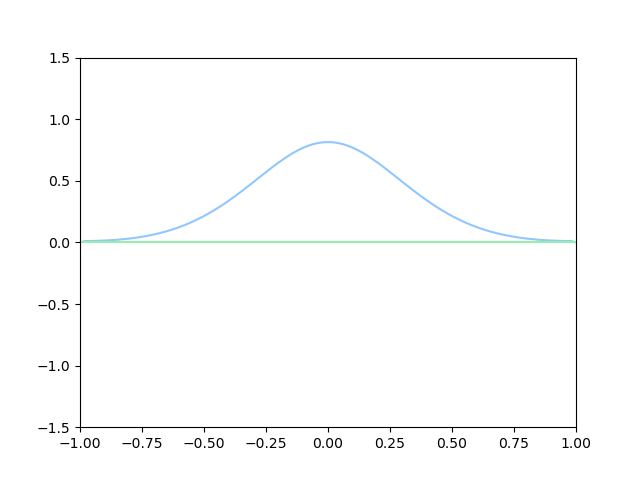

[[0.00033546 0.0004605  0.00062811 ... 0.00062811 0.0004605  0.00033546]
 [0.         0.00046083 0.00062854 ... 0.00062854 0.00046083 0.        ]
 [0.         0.00046574 0.00062984 ... 0.00062984 0.00046568 0.        ]
 ...
 [0.         0.15109117 0.15309665 ... 0.15316956 0.15115484 0.        ]
 [0.         0.15359978 0.15561586 ... 0.15568992 0.15366547 0.        ]
 [0.         0.15614183 0.15816647 ... 0.15824169 0.15620761 0.        ]]


In [46]:
#3-я часть
L = 1
T = 100
a = 0.25
N_z = 100
N_t = 20000
c = 0.5
h = 2*L / N_z
tau = T / N_t
r = c * tau / h #  число Куранта
delta = L / 100
A0 = 10000
z = np.arange(-L, L+h, h)
t = np.arange(0, T+tau, tau)
fi = np.zeros(N_z)
#задаем функцию фи
fi = np.exp(-np.power(z, 2)/(2*a**2))
E = np.zeros([len(t), len(z)])
H = np.zeros([len(t), len(z)])
E[:][0] = fi
print(E[0][3])
E[len(t)-1][0] = 0
E[len(t) - 1][len(z) - 1] = 0
sigma = np.zeros(len(z))
for i in range(len(z)):
    if z[i] > - L and z[i] < - L + delta:
        sigma[i] = A0 * ((z[i] + L - delta)/ delta)**2
    elif z[i] > - L + delta and z[i] < L - delta:
        sigma[i] = 0
    else:
        sigma[i] = A0 * ((z[i] - L + delta)/ delta)**2            
#аналитическое решение
E_analit = np.zeros([len(t), len(z)])
for n in range(len(t)):
    E_analit[n] = 0.5*(np.exp(-np.power(z - c*t[n], 2)/(2*a**2)) + np.exp(-np.power(z + c*t[n], 2)/(2*a**2)))
for j in range(len(z)-1):
    H[0][j+1] = r / 2 * (fi[j+1] - fi[j])
for n in range(len(t)-1):
    for j in range(1,len(z)-1):
        E[n+1][j] = (E[n][j] * (1 - 2*np.pi * sigma[j]*tau) + r*(H[n][j+1] - H[n][j])) / (1 + 2*np.pi * sigma[j]*tau)
    for j in range(len(z)-1):
        H[n+1][j+1] = (H[n][j+1]*(1 - 2*np.pi * (sigma[j]+sigma[j+1])*tau/2) + r * (E[n+1][j+1] - E[n+1][j])) / (1 + 2*np.pi * (sigma[j] + sigma[j+1])*tau/2)
fig = plt.figure()
ax = plt.axes(xlim=(-L, L), ylim=(-1.5, 1.5))
line = []
N = 2
for j in range(N):
    temp, = plt.plot([], [])
    line.append(temp)
line = tuple(line)
def init():
    for j in range(N):
        line[j].set_data([], [])
    return line,
def animate(i):
    x_i = z
    y1 = E[i]
    y2 = E_analit[i]
    line[0].set_data(x_i, y1)
    line[1].set_data(x_i, y2)
    return line,
print(E)
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=20000, interval=1, blit=True, repeat = False)